# Import Modul

In [1]:
import pandas as pd
from Nawa import nawa
from Nawa import ngram
#import re

In [2]:
#Kata Negasi (bisa di-update)
kata_negasi = ["tidak", "bukan","tiada","tak", "jangan"]

# Load Jawaban

In [69]:
#data = pd.read_excel("data/jawaban_hasil_evaluasi_ahli.xlsx")
#jawaban_ = data['jawaban_tanpa_stem'].tolist()
#data.head()
#jawaban_ = jawaban_[311:314]

In [13]:
#data = pd.read_excel("data/jawaban_clean_jawaban buat label_1.xlsx")
data = pd.read_excel("data/jawaban_clean_jawaban buat label_1.xlsx")
data = data[:100]
jawaban_ = data['jawaban_tanpa_stem'].tolist()
#jawaban_ = data['jawaban'].tolist()
#score = data['score']
#data.head()
print("selesai load data")

selesai load data


# Input kunci jawaban

In [14]:
kunci_jawaban = ["telepon 02173811111 kunjungi website buanawisata.com",
                ]

#hanya untuk testing
jawaban = "tidakk kunjunngi 1telepon0217381 1111 2 kunjungi website kami di buanawisata.com"

# Implementasi

# Praproses

In [15]:

def cek_negasi_list(kunci_jawaban):
    if type(kunci_jawaban) is not list:
        kunci_jawaban = [kunci_jawaban]
    new_kj = list()
    for i in kunci_jawaban:
        i = nawa.ubah_simbol(i)
        hasil = nawa.cek_negasi(kata_negasi,i)
        new_kj.append(hasil)
    return new_kj
#cek_negasi_list("tidak telepon pada 02173811111 website buanawisata.com")

def get_unik(kunci_jawaban):
    if type(kunci_jawaban) is not list:
        kunci_jawaban = [kunci_jawaban]
    list_kata_kj = list()
    for i in kunci_jawaban:
        i = nawa.ubah_simbol(i)
        for j in i.split():
            list_kata_kj.append(j)
    list_kata_kj = list(set(list_kata_kj))
    return list_kata_kj
nega = cek_negasi_list(kunci_jawaban)
fitur = get_unik(nega)

kunci_jawaban_unik = " ".join(get_unik(kunci_jawaban))
def praproses(jawaban, kunci_jawaban_unik):
    jawaban = nawa.ubah_simbol(jawaban)
    jawaban = nawa.pisahKata(kunci_jawaban_unik, jawaban)
    jawaban_ngram = ngram.en_geram(kunci_jawaban_unik, jawaban).split()
    #jawaban = jawaban +" "+ " ".join(list(set(jawaban_ngram.split())))
    jawaban = jawaban.split()
    for i in jawaban_ngram:
        if i not in jawaban:
            jawaban.append(i)
    jawaban = " ".join(jawaban)
    jawaban = nawa.cek_typo(kunci_jawaban_unik, jawaban, 0.95)
    jawaban = nawa.cek_negasi(kata_negasi, jawaban)
    return jawaban

#praproses("buanawisata.com", kunci_jawaban_unik)


## Persiapan data

In [16]:

jawaban_praproses = praproses(jawaban, kunci_jawaban_unik)
kunci_jawaban_negasi_list = cek_negasi_list(kunci_jawaban)
nega = cek_negasi_list(kunci_jawaban)
fitur = 0
print("fitur         ->",fitur)
print("Kunci Jawaban ->",kunci_jawaban_negasi_list)
print("Jawaban       ->",jawaban_praproses)

fitur         -> 0
Kunci Jawaban -> ['telepon 02173811111 kunjungi website buanawisatacom']
Jawaban       -> tidak_ kunjungi 1 telepon 0217381 1111 2 kunjungi website kami di buanawisatacom 02173811111


# Menghitung Similarity 

In [17]:
#TF_IDF_DF
def essay_similarity_jaccard_tf_idf_df(kunci_jawaban_negasi_list, jawaban):
    if type(kunci_jawaban_negasi_list) != list:
        kunci_jawaban_negasi_list = [kunci_jawaban_negasi_list]
    simm = list()   
    for kj in kunci_jawaban_negasi_list:
        fitur = list(set(nawa.cek_negasi(kata_negasi, kj).split()))
        #print(fitur)
        t = nawa.tf_idf_df(kj, jawaban, fitur)
        jaccard = nawa.jaccard_baru(t.A[0], t.A[1])
        simm.append(jaccard)
    return max(simm)

def essay_similarity_cosine_tf_idf_df(kunci_jawaban_negasi_list, jawaban):
    if type(kunci_jawaban_negasi_list) != list:
        kunci_jawaban_negasi_list = [kunci_jawaban_negasi_list]
    simm = list()   
    for kj in kunci_jawaban_negasi_list:
        fitur = list(set(nawa.cek_negasi(kata_negasi, kj).split()))
        #print(fitur)
        t = nawa.tf_idf_df(kj, jawaban, fitur)
        jaccard = nawa.cosine_similarity(t.A[0], t.A[1])
        simm.append(jaccard)
    return max(simm)

def essay_similarity_dice_tf_idf_df(kunci_jawaban_negasi_list, jawaban):
    if type(kunci_jawaban_negasi_list) != list:
        kunci_jawaban_negasi_list = [kunci_jawaban_negasi_list]
    simm = list()   
    for kj in kunci_jawaban_negasi_list:
        fitur = list(set(nawa.cek_negasi(kata_negasi, kj).split()))
        #print(fitur)
        t = nawa.tf_idf_df(kj, jawaban, fitur)
        jaccard = nawa.dice_similarity(t.A[0], t.A[1])
        simm.append(jaccard)
    return max(simm)

#TF_IDF
def essay_similarity_jaccard_tf_idf(kunci_jawaban_negasi_list, jawaban):
    if type(kunci_jawaban_negasi_list) != list:
        kunci_jawaban_negasi_list = [kunci_jawaban_negasi_list]
    simm = list()   
    for kj in kunci_jawaban_negasi_list:
        fitur = list(set(nawa.cek_negasi(kata_negasi, kj).split()))
        #print(fitur)
        t = nawa.tf_idf_df(kj, jawaban, fitur)
        jaccard = nawa.jaccard_baru(t.A[0], t.A[1])
        simm.append(jaccard)
    return max(simm)

def essay_similarity_cosine_tf_idf(kunci_jawaban_negasi_list, jawaban):
    if type(kunci_jawaban_negasi_list) != list:
        kunci_jawaban_negasi_list = [kunci_jawaban_negasi_list]
    simm = list()   
    for kj in kunci_jawaban_negasi_list:
        fitur = list(set(nawa.cek_negasi(kata_negasi, kj).split()))
        #print(fitur)
        t = nawa.tf_idf(kj, jawaban, fitur)
        jaccard = nawa.cosine_similarity(t.A[0], t.A[1])
        simm.append(jaccard)
    return max(simm)

def essay_similarity_dice_tf_idf(kunci_jawaban_negasi_list, jawaban):
    if type(kunci_jawaban_negasi_list) != list:
        kunci_jawaban_negasi_list = [kunci_jawaban_negasi_list]
    simm = list()   
    for kj in kunci_jawaban_negasi_list:
        fitur = list(set(nawa.cek_negasi(kata_negasi, kj).split()))
        #print(fitur)
        t = nawa.tf_idf(kj, jawaban, fitur)
        jaccard = nawa.dice_similarity(t.A[0], t.A[1])
        simm.append(jaccard)
    return max(simm)

#DF
def essay_similarity_jaccard_df(kunci_jawaban_negasi_list, jawaban):
    if type(kunci_jawaban_negasi_list) != list:
        kunci_jawaban_negasi_list = [kunci_jawaban_negasi_list]
    simm = list()   
    for kj in kunci_jawaban_negasi_list:
        fitur = list(set(nawa.cek_negasi(kata_negasi, kj).split()))
        #print(fitur)
        t = nawa.df(kj, jawaban, fitur)
        jaccard = nawa.jaccard_baru(t.A[0], t.A[1])
        simm.append(jaccard)
    return max(simm)

def essay_similarity_cosine_df(kunci_jawaban_negasi_list, jawaban):
    if type(kunci_jawaban_negasi_list) != list:
        kunci_jawaban_negasi_list = [kunci_jawaban_negasi_list]
    simm = list()   
    for kj in kunci_jawaban_negasi_list:
        fitur = list(set(nawa.cek_negasi(kata_negasi, kj).split()))
        #print(fitur)
        t = nawa.df(kj, jawaban, fitur)
        jaccard = nawa.cosine_similarity(t.A[0], t.A[1])
        simm.append(jaccard)
    return max(simm)

def essay_similarity_dice_df(kunci_jawaban_negasi_list, jawaban):
    if type(kunci_jawaban_negasi_list) != list:
        kunci_jawaban_negasi_list = [kunci_jawaban_negasi_list]
    simm = list()   
    for kj in kunci_jawaban_negasi_list:
        fitur = list(set(nawa.cek_negasi(kata_negasi, kj).split()))
        #print(fitur)
        t = nawa.df(kj, jawaban, fitur)
        jaccard = nawa.dice_similarity(t.A[0], t.A[1])
        simm.append(jaccard)
    return max(simm)

def transform(simmm):
    if simmm <= 0.25:
        return "sangat tidak mirip"
    elif simmm <= 0.5:
        return "tidak mirip"
    elif simmm <= 0.75:
        return "mirip"
    elif simmm <= 1:
        return "sangat mirip"
    else:
        return "error"

## Proses Perhitungan Similarity

In [18]:

jawaban_cektypo = []
tf_idf_jaccard = []
tf_idf_cosine = []
tf_idf_dice = []

tf_idf_df_jaccard = []
tf_idf_df_cosine = []
tf_idf_df_dice = []

df_jaccard = []
df_cosine = []
df_dice = []
ct =0

dice_list_t_tfidf = list()
jaccard_list_t_tfidf = list()
cosine_list_t_tfidf = list()

dice_list_t_tfidfdf = list()
jaccard_list_t_tfidfdf = list()
cosine_list_t_tfidfdf = list()

dice_list_t_df = list()
jaccard_list_t_df = list()
cosine_list_t_df = list()

for i in jawaban_:
    i = praproses(i, kunci_jawaban_unik)
    jaccard = essay_similarity_jaccard_tf_idf_df(kunci_jawaban_negasi_list, i)
    cosine = essay_similarity_cosine_tf_idf_df(kunci_jawaban_negasi_list, i)
    dice = essay_similarity_dice_tf_idf_df(kunci_jawaban_negasi_list, i)
    tf_idf_df_jaccard.append(jaccard)
    tf_idf_df_cosine.append(cosine)
    tf_idf_df_dice.append(dice)
    jaccard_list_t_tfidfdf.append(transform(jaccard))
    cosine_list_t_tfidfdf.append(transform(cosine))
    dice_list_t_tfidfdf.append(transform(dice))
        
    jaccard = essay_similarity_jaccard_tf_idf(kunci_jawaban_negasi_list, i)
    cosine = essay_similarity_cosine_tf_idf(kunci_jawaban_negasi_list, i)
    dice = essay_similarity_dice_tf_idf(kunci_jawaban_negasi_list, i)
    tf_idf_jaccard.append(jaccard)
    jaccard_list_t_tfidf.append(transform(jaccard))
    tf_idf_cosine.append(cosine)
    cosine_list_t_tfidf.append(transform(cosine))
    tf_idf_dice.append(dice)
    dice_list_t_tfidf.append(transform(dice))
    
    jaccard = essay_similarity_jaccard_df(kunci_jawaban_negasi_list, i)
    cosine = essay_similarity_cosine_df(kunci_jawaban_negasi_list, i)
    dice = essay_similarity_dice_df(kunci_jawaban_negasi_list, i)
    df_jaccard.append(jaccard)
    df_cosine.append(cosine)
    df_dice.append(dice)
    jaccard_list_t_df.append(transform(jaccard))
    cosine_list_t_df.append(transform(cosine))
    dice_list_t_df.append(transform(dice))
    
dict1 = {"jawaban":jawaban_,
         "tf_idf_dice":tf_idf_dice,
        "tf_idf_jaccard":tf_idf_jaccard, 
        "tf_idf_cosine":tf_idf_cosine,
        "tf_idf_df_dice":tf_idf_df_dice,
       "tf_idf_df_jaccard":tf_idf_df_jaccard,
        "tf_idf_df_cosine":tf_idf_df_cosine,
        "df_dice":df_dice,
        "df_jaccard":df_jaccard,
        "df_cosine":df_cosine
       }

dic2 = {
    "jawaban":jawaban_,
    "dice_tf-idf":dice_list_t_tfidf,
    "jaccard_tf-idf":jaccard_list_t_tfidf,
    "cosine_tf-idf":cosine_list_t_tfidf,

    "dice_tf-idf-df":dice_list_t_tfidfdf,
    "jaccard_tf-idf-df":jaccard_list_t_tfidfdf,
    "cosine_tf-idf-df":cosine_list_t_tfidfdf,

    "dice_df":dice_list_t_df,
    "jaccard_df":jaccard_list_t_df,
    "cosine_df":cosine_list_t_df
}

dict3 = {
    "jawaban":jawaban_,
    "tf_idf_dice":tf_idf_dice,
    "dice_tf-idf":dice_list_t_tfidf,
    "tf_idf_jaccard":tf_idf_jaccard,
    "jaccard_tf-idf":jaccard_list_t_tfidf,
    "tf_idf_cosine":tf_idf_cosine,
    "cosine_tf-idf":cosine_list_t_tfidf,
    "tf_idf_df_dice":tf_idf_df_dice,
    "dice_tf-idf-df":dice_list_t_tfidfdf,
    "tf_idf_df_jaccard":tf_idf_df_jaccard,
    "jaccard_tf-idf-df":jaccard_list_t_tfidfdf,
    "tf_idf_df_cosine":tf_idf_df_cosine,
    "cosine_tf-idf-df":cosine_list_t_tfidfdf,
    "df_dice":df_dice,
    "dice_df":dice_list_t_df,
    "df_jaccard":df_jaccard,
    "jaccard_df":jaccard_list_t_df,
    "df_cosine":df_cosine,
    "cosine_df":cosine_list_t_df
}
df1 = pd.DataFrame.from_dict(dict1)
df2 = pd.DataFrame.from_dict(dic2)
df3 = pd.DataFrame.from_dict(dict3)
df3.head()

,jawaban,tf_idf_dice,dice_tf-idf,tf_idf_jaccard,jaccard_tf-idf,tf_idf_cosine,cosine_tf-idf,tf_idf_df_dice,dice_tf-idf-df,tf_idf_df_jaccard,jaccard_tf-idf-df,tf_idf_df_cosine,cosine_tf-idf-df,df_dice,dice_df,df_jaccard,jaccard_df,df_cosine,cosine_df
0,ayo kunjungi machu picchu yang megahsejuk dan ...,0.502329,mirip,0.335407,tidak mirip,0.502,mirip,0.502329,mirip,0.335407,tidak mirip,0.502,mirip,0.571429,mirip,0.4,tidak mirip,0.633,mirip
1,telepon0217381 1111 untuk mengetahui info lebi...,1.000000,sangat mirip,1.000000,sangat mirip,1.000,sangat mirip,1.000000,sangat mirip,1.000000,sangat mirip,1.000,sangat mirip,1.000000,sangat mirip,1.0,sangat mirip,1.000,sangat mirip
2,"""pendakian dua hari bersama buana wisata ke ma...",0.335176,tidak mirip,0.201328,sangat tidak mirip,0.335,tidak mirip,0.335176,tidak mirip,0.201328,sangat tidak mirip,0.335,tidak mirip,0.333333,tidak mirip,0.2,sangat tidak mirip,0.447,tidak mirip
3,anda dapat menelepon 021 7381 1111 sekarang ju...,0.818180,sangat mirip,0.692305,mirip,0.818,sangat mirip,0.818180,sangat mirip,0.692305,mirip,0.818,sangat mirip,0.888889,sangat mirip,0.8,sangat mirip,0.894,sangat mirip
4,arsitektur yang menabjub kan teras teras yang ...,0.000000,sangat tidak mirip,0.000000,sangat tidak mirip,0.000,sangat tidak mirip,0.000000,sangat tidak mirip,0.000000,sangat tidak mirip,0.000,sangat tidak mirip,0.000000,sangat tidak mirip,0.0,sangat tidak mirip,0.000,sangat tidak mirip


sangat mirip          39
sangat tidak mirip    27
tidak mirip           22
mirip                 12
Name: dice_tf-idf, dtype: int64

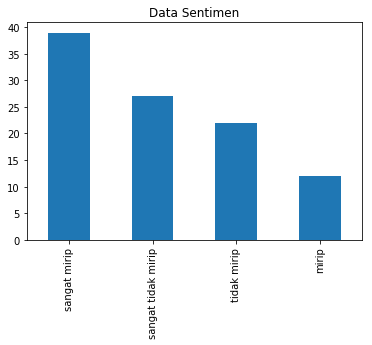

In [19]:
pd.value_counts(df2['dice_tf-idf']).plot.bar(title='Data Sentimen')
pd.value_counts(df2['dice_tf-idf'])
#df2['dice_tf-idf']

In [21]:
import datetime
waktu = str(datetime.datetime.now()).replace(":","-")
writer = pd.ExcelWriter('hasil\pelabelan\hasil_'+waktu+'_2.xlsx', engine='xlsxwriter')
df1.to_excel(writer, sheet_name='Sheet1')
# Close the Pandas Excel writer and output the Excel file.
writer.save()

writer = pd.ExcelWriter('hasil\pelabelan\hasil_transform_'+waktu+'_2.xlsx', engine='xlsxwriter')
df2.to_excel(writer, sheet_name='Sheet1')
# Close the Pandas Excel writer and output the Excel file.
writer.save()


writer = pd.ExcelWriter('hasil\pelabelan\hasil_gabungan_'+waktu+'_2.xlsx', engine='xlsxwriter')
df3.to_excel(writer, sheet_name='Sheet1')
# Close the Pandas Excel writer and output the Excel file.
writer.save()
df2

,jawaban,dice_tf-idf,jaccard_tf-idf,cosine_tf-idf,dice_tf-idf-df,jaccard_tf-idf-df,cosine_tf-idf-df,dice_df,jaccard_df,cosine_df
0,ayo kunjungi machu picchu yang megahsejuk dan ...,mirip,tidak mirip,mirip,mirip,tidak mirip,mirip,mirip,tidak mirip,mirip
1,telepon0217381 1111 untuk mengetahui info lebi...,sangat mirip,sangat mirip,sangat mirip,sangat mirip,sangat mirip,sangat mirip,sangat mirip,sangat mirip,sangat mirip
2,"""pendakian dua hari bersama buana wisata ke ma...",tidak mirip,sangat tidak mirip,tidak mirip,tidak mirip,sangat tidak mirip,tidak mirip,tidak mirip,sangat tidak mirip,tidak mirip
3,anda dapat menelepon 021 7381 1111 sekarang ju...,sangat mirip,mirip,sangat mirip,sangat mirip,mirip,sangat mirip,sangat mirip,sangat mirip,sangat mirip
4,arsitektur yang menabjub kan teras teras yang ...,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip
5,berbagai perjalanan wisata yang akan membantu ...,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip
6,berkunjunglah selama beberapa hari atau tingga...,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip,sangat tidak mirip
7,biro perjalanan buana wisata menawaekanbwerbag...,tidak mirip,sangat tidak mirip,tidak mirip,tidak mirip,sangat tidak mirip,tidak mirip,tidak mirip,sangat tidak mirip,tidak mirip
8,biro perjalanan buana wisata menawarka berbaga...,tidak mirip,sangat tidak mirip,tidak mirip,tidak mirip,sangat tidak mirip,tidak mirip,tidak mirip,sangat tidak mirip,tidak mirip
9,telepon021 7381 1111 untuk informasi lebih lan...,sangat mirip,sangat mirip,sangat mirip,sangat mirip,sangat mirip,sangat mirip,sangat mirip,sangat mirip,sangat mirip
